# Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Now I am Going to Read Dataset

In [3]:
path = "C:/Users/Lenovo/Desktop/New folder/HR.csv"

In [4]:
df = pd.read_csv(path)

In [6]:
df.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Dataset columns

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Columns datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Groupby column data types

In [9]:
df.columns.groupby(df.dtypes)

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

# Number of columns

In [10]:
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[0], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[1], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[1]])))

No of columns for int64 is 26.
No of columns for object is 9.


# Check for missing values

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Summary statistics

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


# plot histogram for numeric columns
# plt.savefig("histograms.png", bbox_inches="tight")

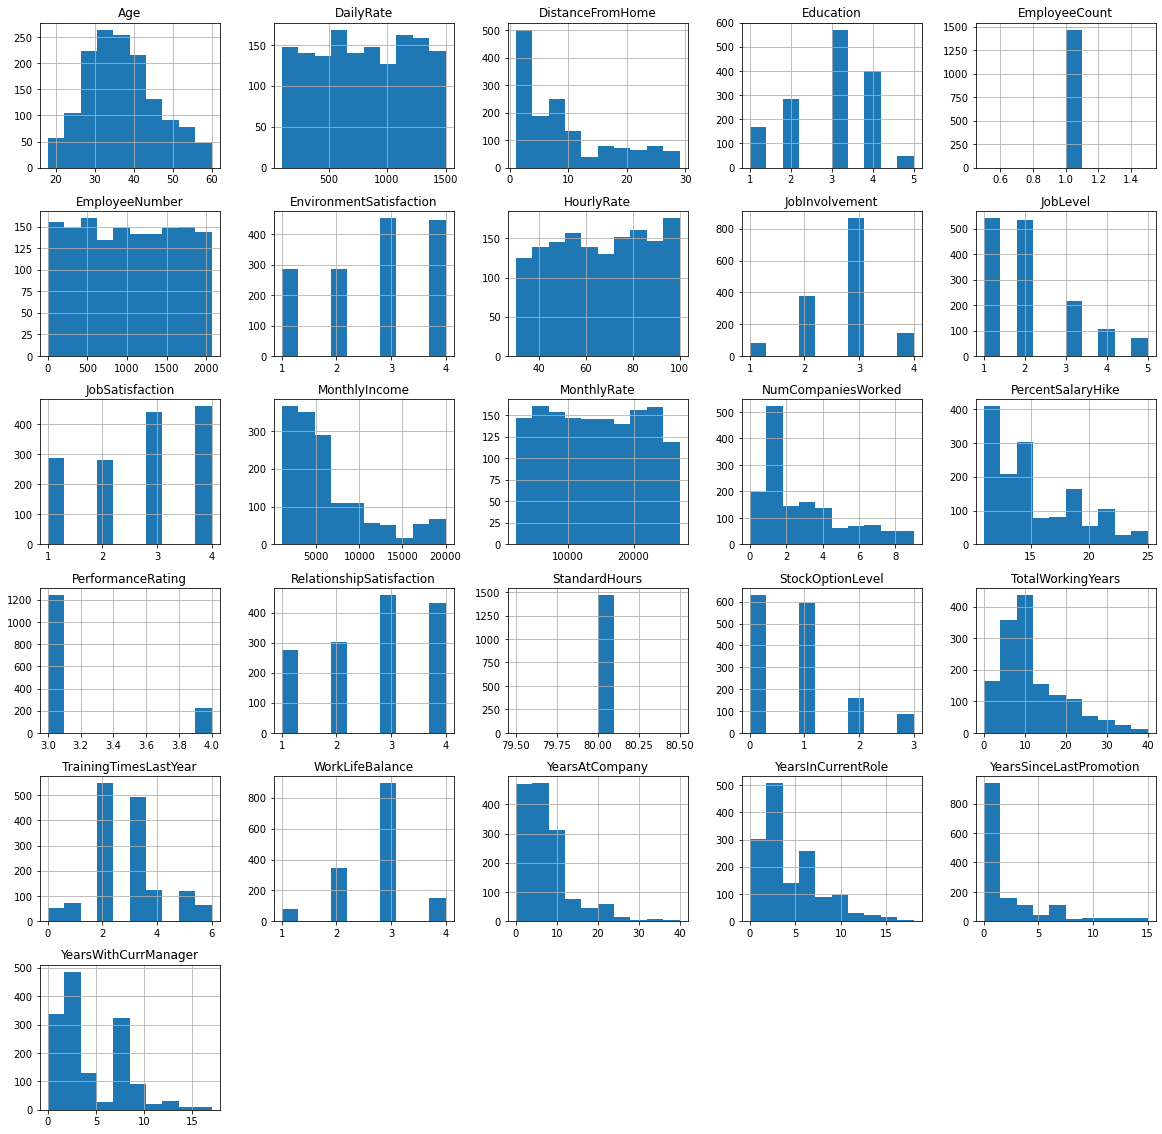

In [14]:
df.hist(figsize=(20,20))
plt.show()

# Features / Input Variables
# Age
Age of employees is from 18 to 60 years old. The average age of ex-employees at 33.6 years old and 37.6 years old for current employees.

In [15]:
print("Age of employees is from {} to {} years old.".format(df['Age'].min(), df['Age'].max()))

Age of employees is from 18 to 60 years old.


# Ex-Employees

In [16]:
print("Ex-Employees:")
print("Average Age of Ex-Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'Age'])))

Ex-Employees:
Average Age of Ex-Employees = 33.6
Standard Deviation = 9.7


# Active Employees

In [17]:
print("Active Employees:")
print("Average Age of Active Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'No', 'Age'])))

Active Employees:
Average Age of Active Employees = 37.6
Standard Deviation = 8.9


#Active Employees:
#Average Age of Active Employees = 37.6
#Standard Deviation = 8.9
#We can create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Density plots are representations of the underlying distribution.

In [19]:
import warnings
warnings.filterwarnings('ignore')

# kernel density estimation (KDE) plot 
# plt.savefig("age_kde.png", bbox_inches="tight")

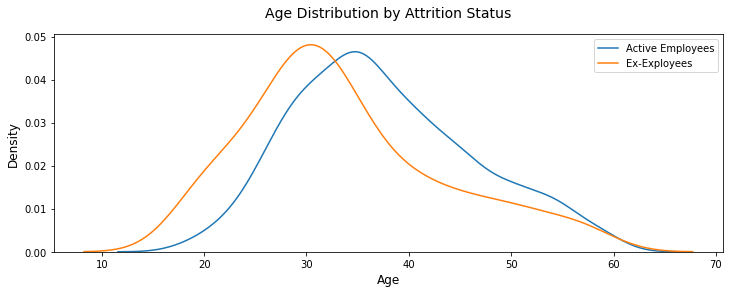

In [20]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)


plt.show()

# kernel density estimation (KDE) plot 
# plt.savefig("age_kde.png", bbox_inches="tight")

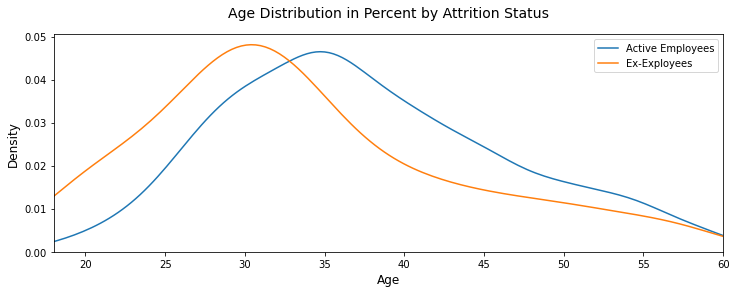

In [21]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlim(df["Age"].min(), df["Age"].max())
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution in Percent by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)


plt.show()

# plot histogram
# plt.savefig("age_hist.png", bbox_inches="tight")

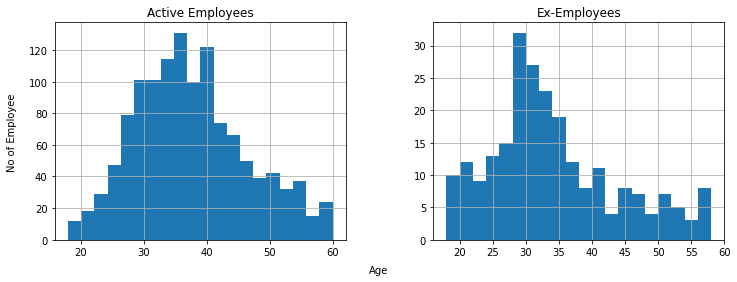

In [22]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['Age']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['Age']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Age', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')


plt.show()


# Gender
Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17% for Males and 15% for Females.

# Gender of employees

In [23]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [24]:
df['Gender'].value_counts(normalize=True)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

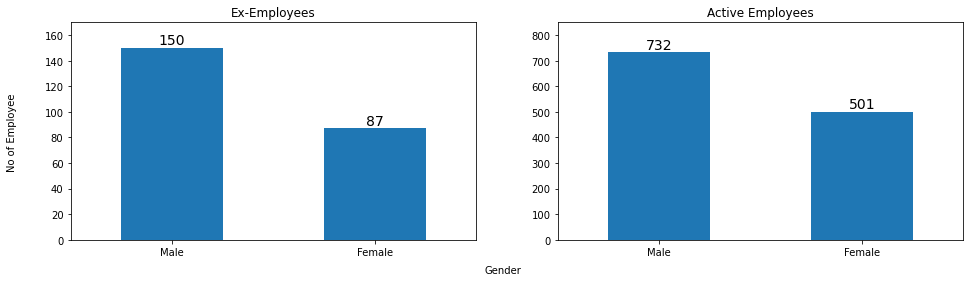

In [25]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')


plt.show()

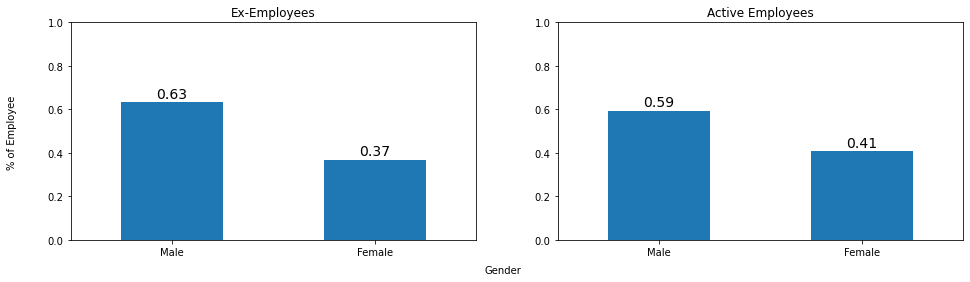

In [26]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')


plt.show()

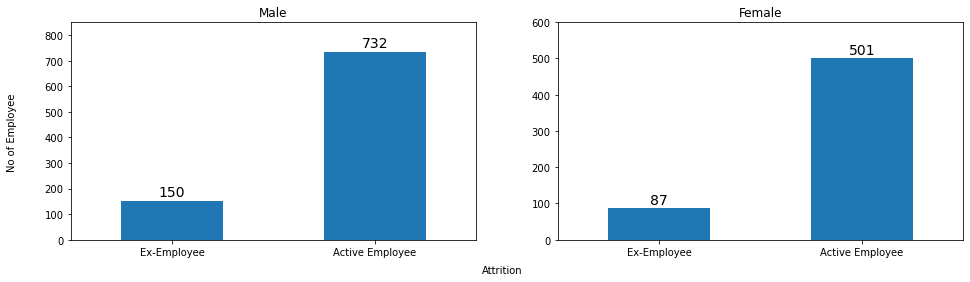

In [27]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')


plt.show()

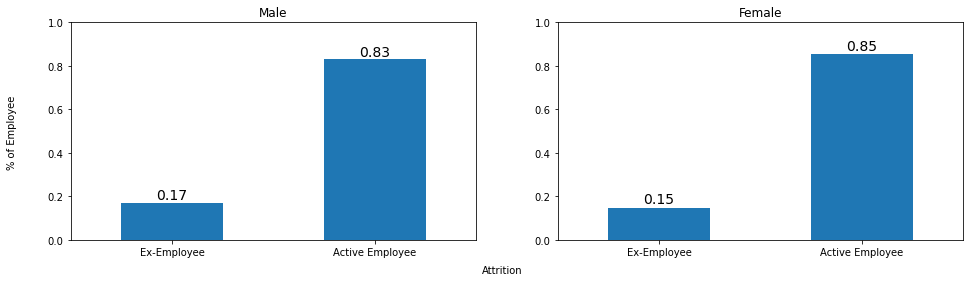

In [28]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.015, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')


plt.show()

# Marital Status
The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees). Single employees show the largest proportion of leavers at 25%.

In [29]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

# marital Status of employees

In [30]:
df['MaritalStatus'].value_counts(normalize=True)

Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64

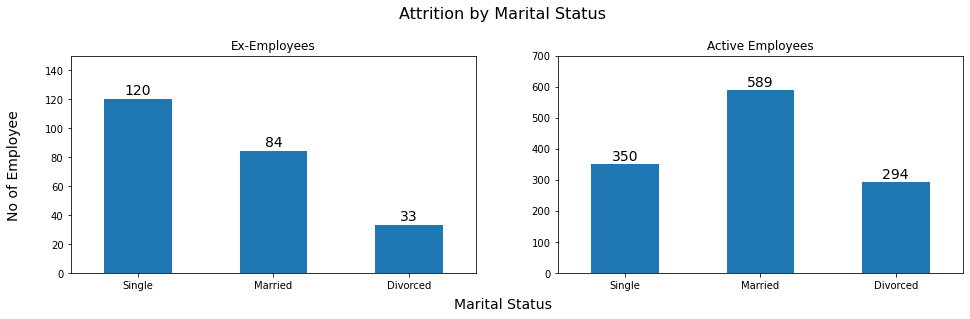

In [31]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'MaritalStatus'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'MaritalStatus'].value_counts().reindex(["Single", "Married","Divorced"]).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition by Marital Status', x=0.5, y=1.05, ha='center', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()

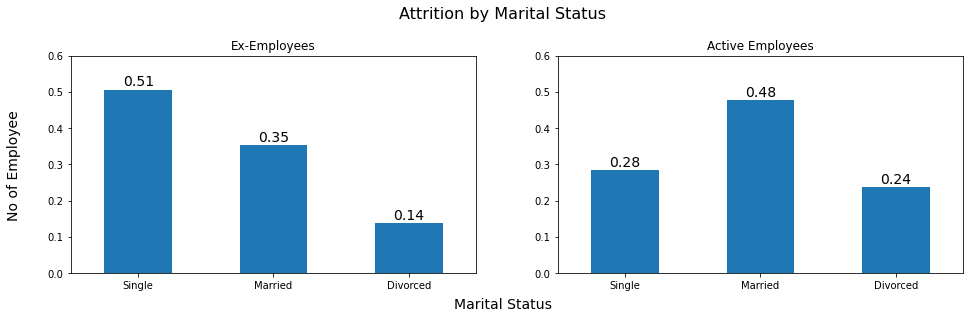

In [32]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "MaritalStatus"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "MaritalStatus"].value_counts(normalize=True).reindex(["Single", "Married","Divorced"]).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    

plt.suptitle("Attrition by Marital Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)


plt.show()

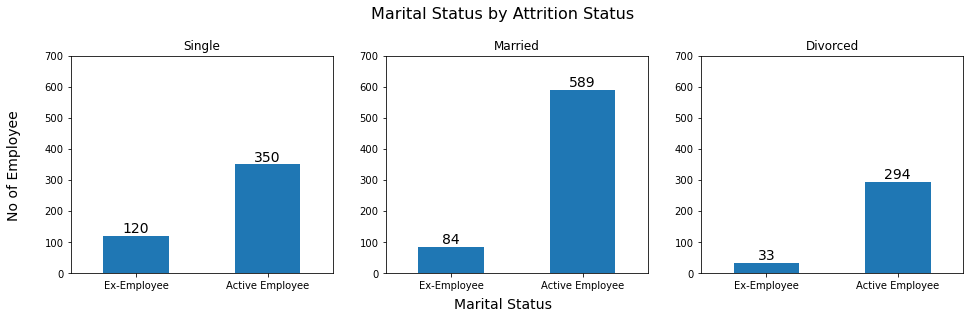

In [33]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    

plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)


plt.show()

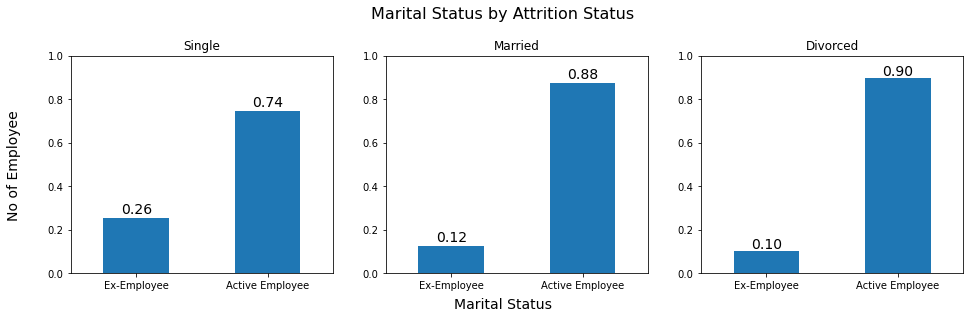

In [34]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    

plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)


plt.show()

# Distance from Home
Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [35]:
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(), df['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [36]:
print("Ex-Employees:")
print("Average Distance From Home of Ex-Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))

Ex-Employees:
Average Distance From Home of Ex-Employees = 10.63 miles
Standard Deviation = 8.43


In [37]:
print("Active Employees:")
print("Average Distance From Home of Active Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))

Active Employees:
Average Distance From Home of Active Employees = 8.92 miles
Standard Deviation = 8.01


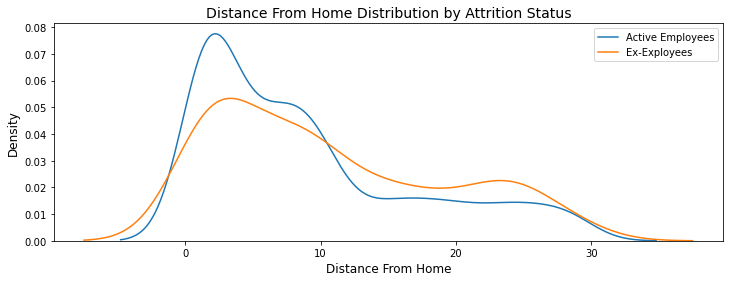

In [38]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["DistanceFromHome"]], hist=False, label="Active Employees")
sns.distplot(target_1[["DistanceFromHome"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)


plt.show()

#You can get negative x-values ending up with some positive density from a kernel density estimate, simply because of the way KDEs work. Refe

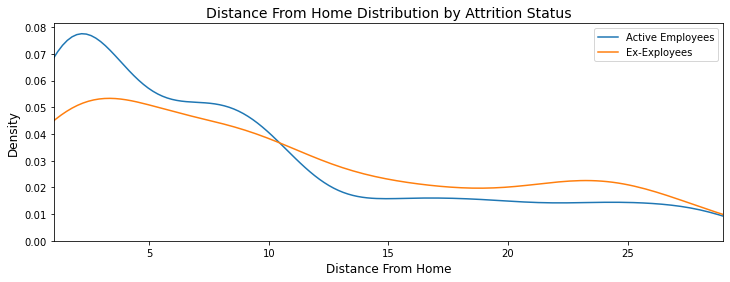

In [39]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["DistanceFromHome"]], hist=False, label="Active Employees")
sns.distplot(target_1[["DistanceFromHome"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlim(df["DistanceFromHome"].min(), df["DistanceFromHome"].max())
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)


plt.show()

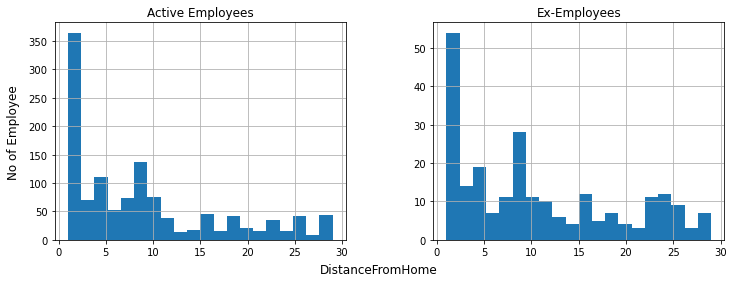

In [40]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['DistanceFromHome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['DistanceFromHome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'DistanceFromHome', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)


plt.show()

# Department
The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [41]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [42]:
df['Department'].value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

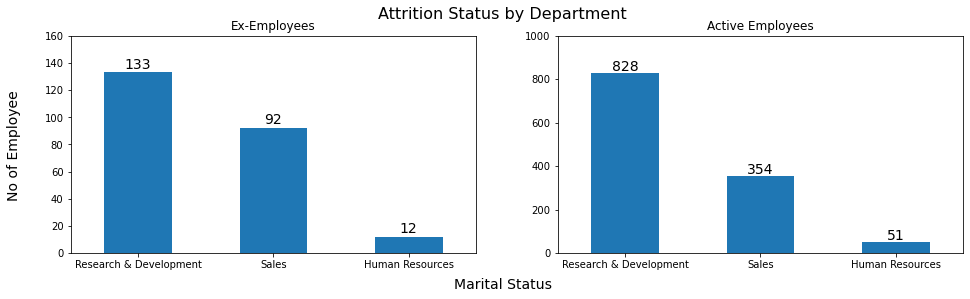

In [43]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Department'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,160)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Department'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.suptitle('Attrition Status by Department', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()

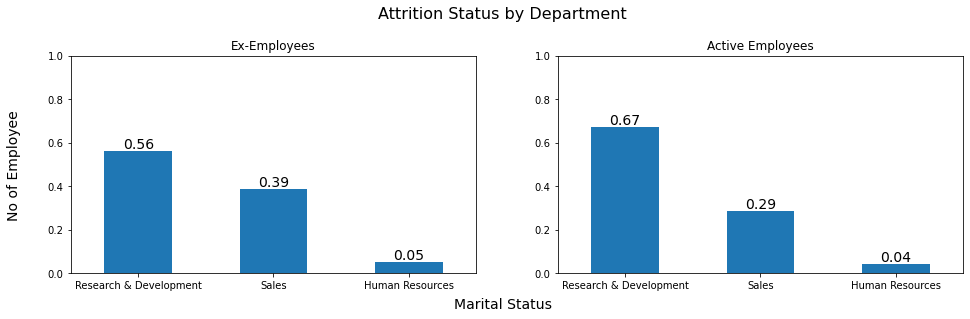

In [44]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "Department"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "Department"].value_counts(normalize=True).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    

plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)


plt.show()

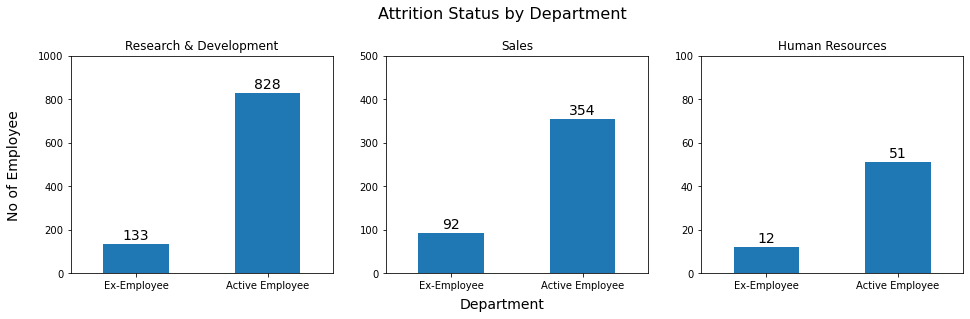

In [45]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,500)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,100)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+2, "{:1.0f}".format(height), ha="center", fontsize=14) 
    

plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Department", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)


plt.show()

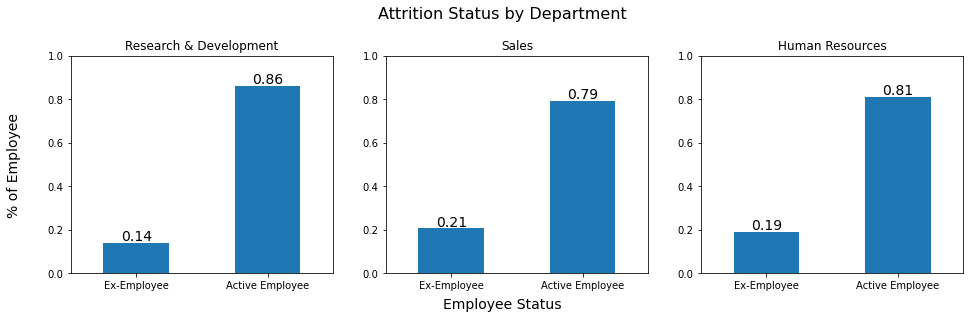

In [46]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    

plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Employee Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "% of Employee", va="center", rotation="vertical", fontsize=14)


plt.show()

# Job Role
Sale Representative has the highest proportion of leavers, followed by Laboratory Technician and Human Resources.

In [47]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [48]:
df['JobRole'].value_counts(normalize=True)

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

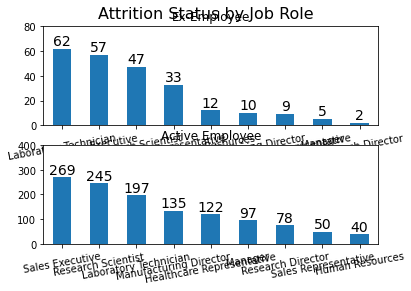

In [49]:
plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,80)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts().plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()


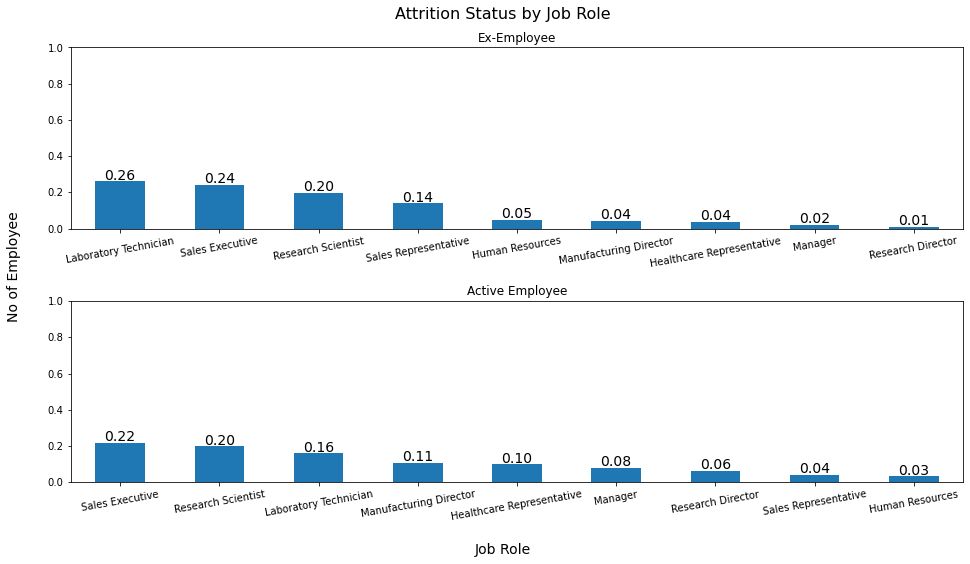

In [50]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)


plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()

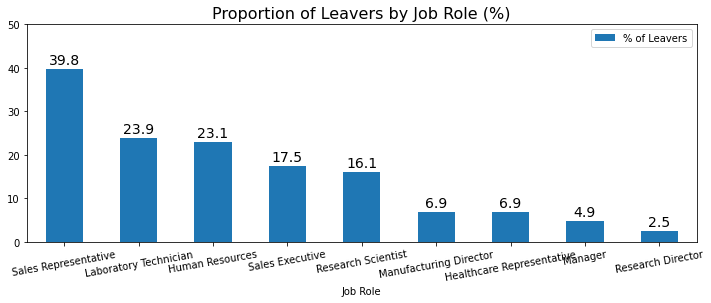

In [51]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
      
df_JR = df_JobRole.groupby(by="Job Role").sum()
g = df_JR.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Role (%)",  fontsize=16)
plt.xticks(rotation=10)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 


plt.show()

# Job Level
Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [52]:
df['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [53]:
df['JobLevel'].value_counts(normalize=True)

1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: JobLevel, dtype: float64

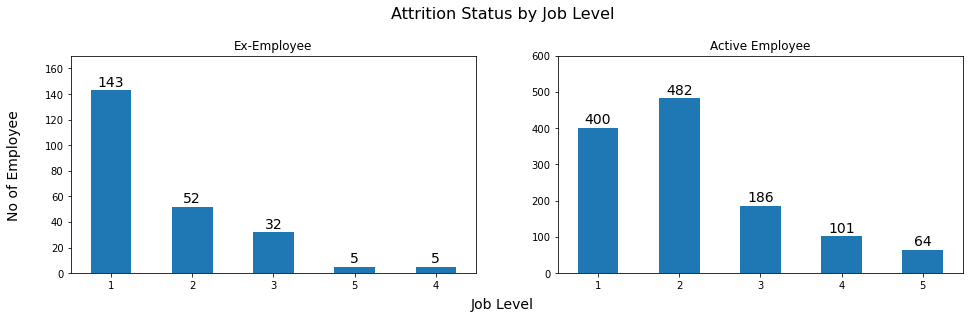

In [54]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts().reindex([1,2,3,4,5]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()

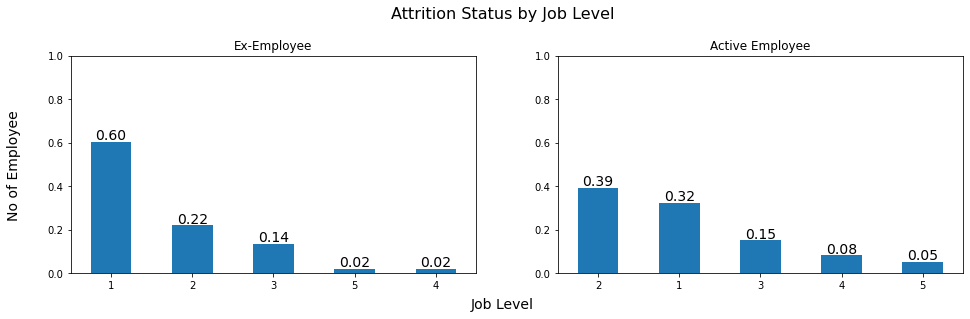

In [55]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 


plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()

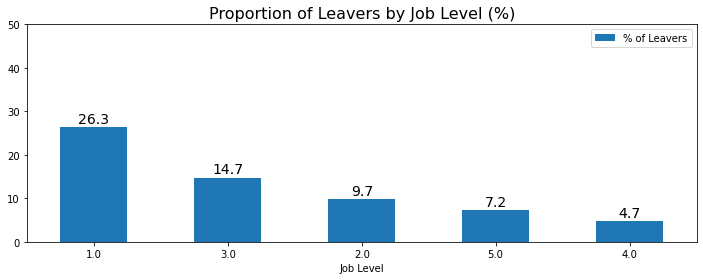

In [56]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
       
df_JL = df_JobLevel.groupby(by="Job Level").sum()
g = df_JL.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Level (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 


plt.show()

# Years at the Company
The average number of years at the company for currently active employees is 7.37 years and ex-employees is 5.13 years.

In [57]:
print("Years At Company for employees is from {} to {} years.".format(df['YearsAtCompany'].min(), df['YearsAtCompany'].max()))

Years At Company for employees is from 0 to 40 years.


In [58]:
print("Ex-Employees:")
print("Average Years At Company of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))

Ex-Employees:
Average Years At Company of Ex-Employees = 5.13 years
Standard Deviation = 5.94


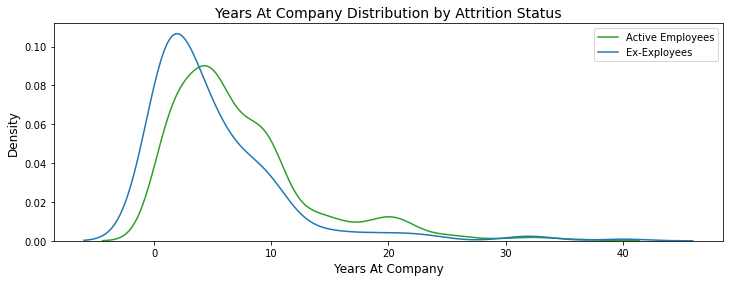

In [59]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["YearsAtCompany"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["YearsAtCompany"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlabel("Years At Company", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years At Company Distribution by Attrition Status", fontsize=14)


plt.show()

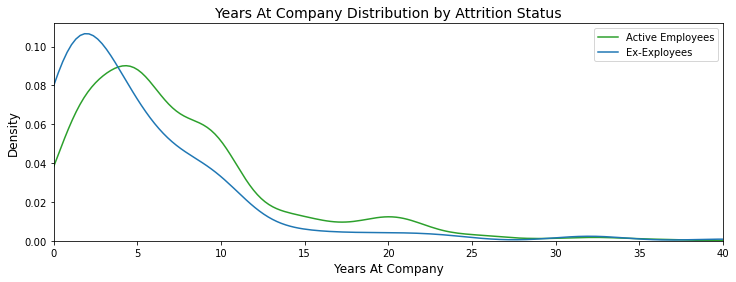

In [60]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["YearsAtCompany"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["YearsAtCompany"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlim(df["YearsAtCompany"].min(), df["YearsAtCompany"].max())
plt.xlabel("Years At Company", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years At Company Distribution by Attrition Status", fontsize=14)


plt.show()

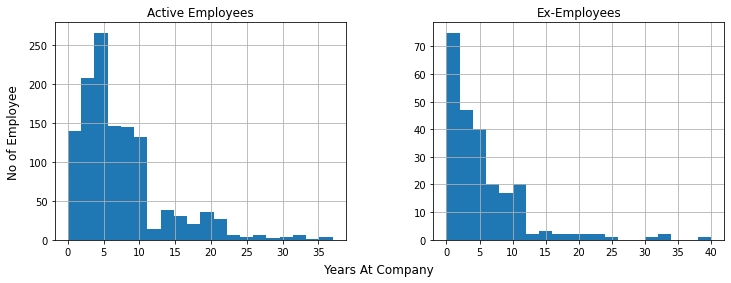

In [61]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['YearsAtCompany']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['YearsAtCompany']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Years At Company', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)


plt.show()

# Overtime
Some employees have overtime commitments. The data clearly show that there is significant larger portion of employees with OT that have left the company.

In [62]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [63]:
df['OverTime'].value_counts(normalize=True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

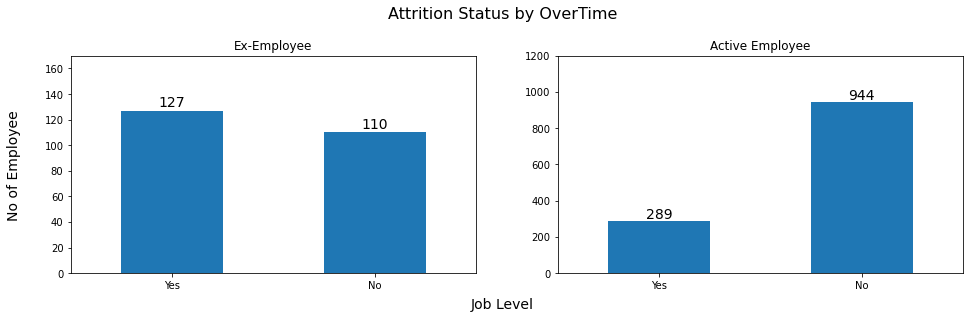

In [64]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1200)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()


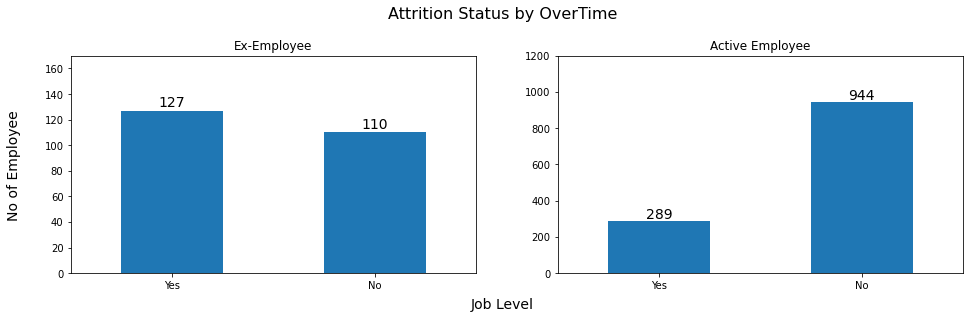

In [65]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1200)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()


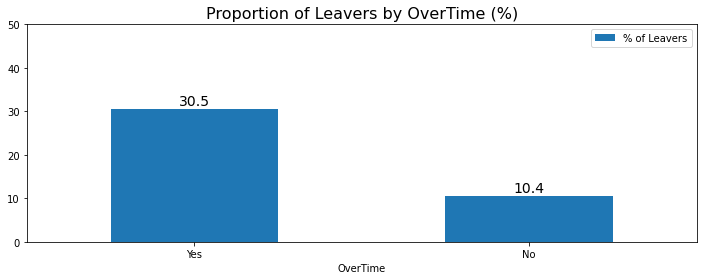

In [66]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
        
df_OT = df_OverTime.groupby(by="OverTime").sum()
g = df_OT.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by OverTime (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 


plt.show()


# Work-Life Balance Score
A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

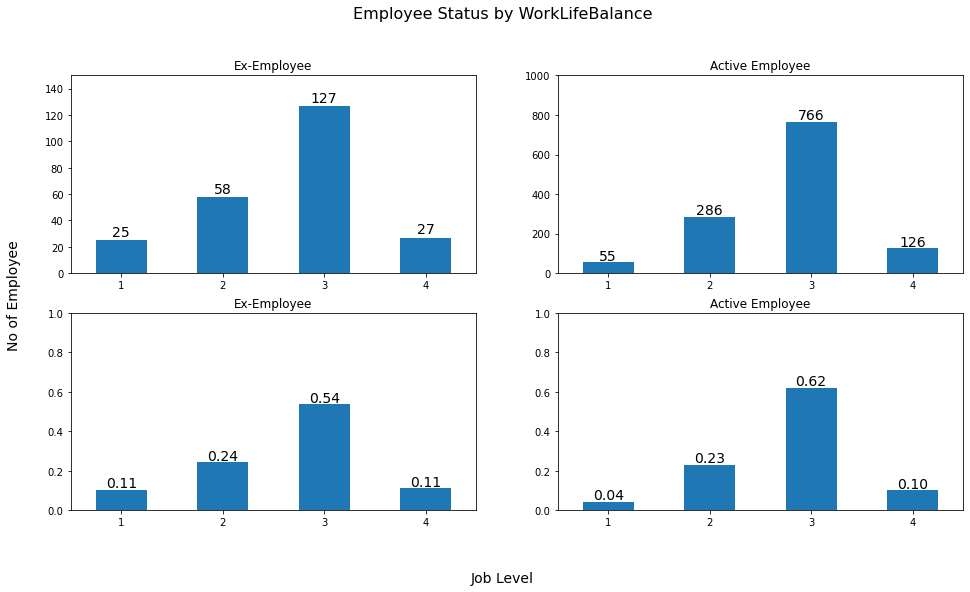

In [67]:
df['WorkLifeBalance'].value_counts()
df['WorkLifeBalance'].value_counts(normalize=True)

fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(222)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.subplot(223)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 


plt.suptitle('Employee Status by WorkLifeBalance', x=0.5, y=1, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)


plt.show()

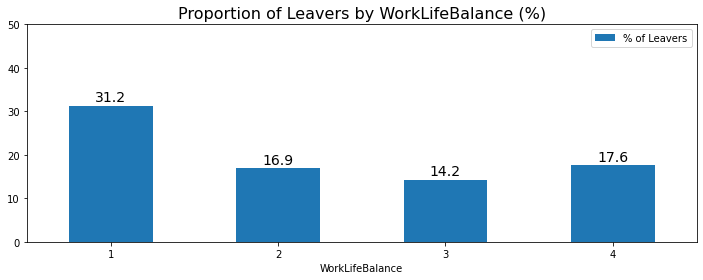

In [68]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
       
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
g = df_WLB.sort_values(by=['% of Leavers'], ascending=False).reindex([1,2,3,4]).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by WorkLifeBalance (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 


plt.show()


# Monthly Income
Employee Monthly Income varies from \$1,009 to \$19,999.

In [69]:
print("Monthly Income for employees is from ${} to ${}.".format(df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Monthly Income for employees is from $1009 to $19999.


In [70]:
print("Ex-Employees:")
print("Average Monthly Income of Ex-Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))

Ex-Employees:
Average Monthly Income of Ex-Employees = $4787.09
Standard Deviation = $3632.52


In [71]:
print("Active Employees:")
print("Average Monthly Income of Active Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))

Active Employees:
Average Monthly Income of Active Employees = $6832.74
Standard Deviation = $4816.25


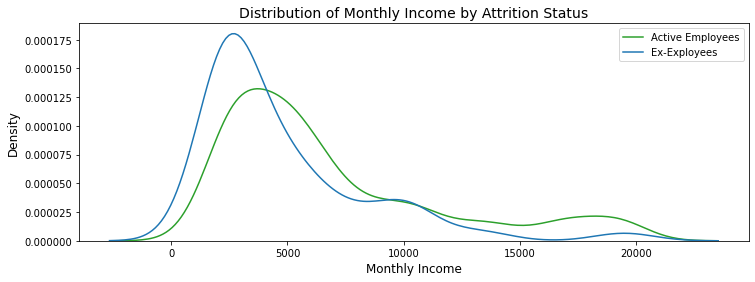

In [72]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["MonthlyIncome"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["MonthlyIncome"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)


plt.show()

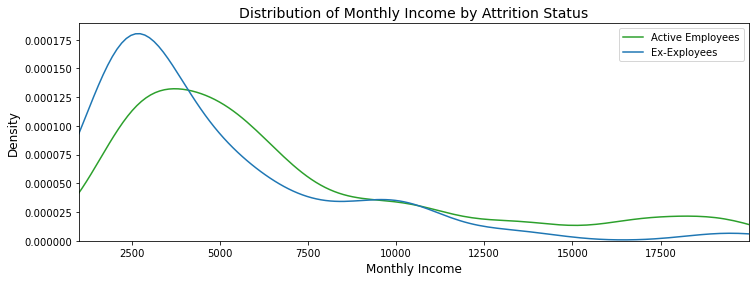

In [73]:
plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["MonthlyIncome"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["MonthlyIncome"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlim(df["MonthlyIncome"].min(), df["MonthlyIncome"].max())
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)


plt.show()

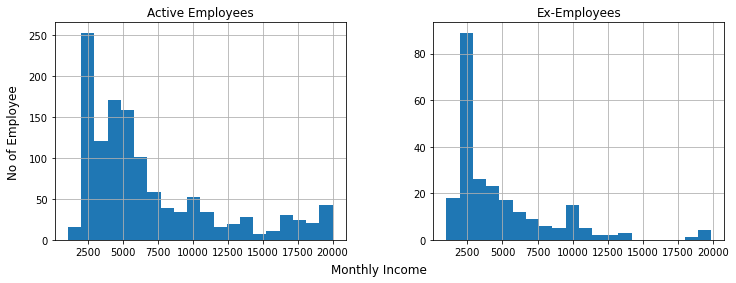

In [74]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['MonthlyIncome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['MonthlyIncome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Monthly Income', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)


plt.show()


# Target Variable: Attrition
The feature “Attrition” is what this Machine Learning problem is about. We are trying to predict the value of the feature ‘Attrition’ by using other related features associated with the employee’s personal and professional history.

In the supplied dataset, the percentage of Current Employees is 83.9% and of Ex-employees is 16.1%. Hence, this is an imbalanced class problem.

Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

In [75]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [76]:
df['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

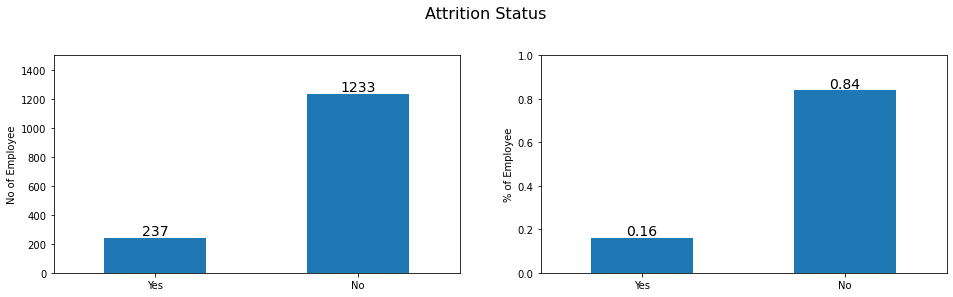

In [77]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df['Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("No of Employee")
plt.ylim(0,1500)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df['Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar( color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("% of Employee")
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    

plt.suptitle("Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)



plt.show()

#  Correlation
Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [78]:
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [79]:
corr = df_corr.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


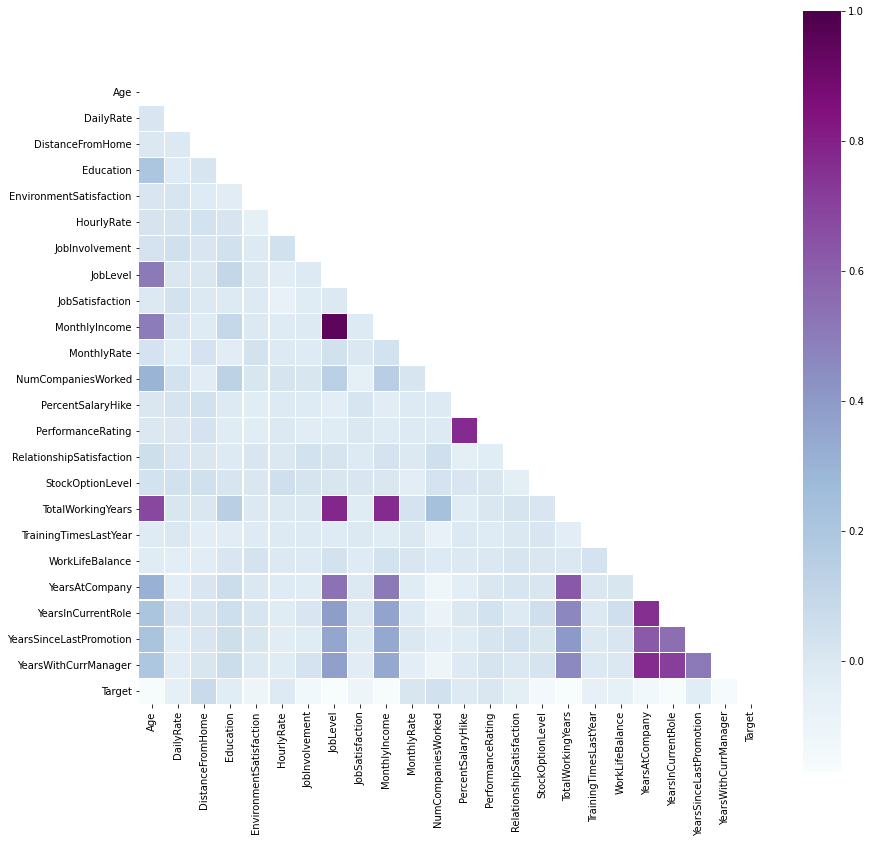

In [80]:
plt.figure(figsize=(14, 14))


mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = sns.heatmap(corr, vmax=1, square=True, cmap="BuPu", linewidths=.1, annot=False, mask=mask)

 
plt.show()

#  Pre-processing Pipeline
In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

Encoding
Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Label Encoding and One-Hot Encoding as shown below.

In [81]:

print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [83]:
le_count = 0
for col in df.columns:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [84]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [85]:
df = pd.get_dummies(df)

In [86]:
print(df.shape)
df.head()

(1470, 54)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


# Splitting data into training and testing sets
Prior to implementating or applying any Machine Learning algorithms, we must split the dataset into training and testing sets.

In [87]:
y = df['Attrition']

In [88]:
print(type(y))
y[:5]

<class 'pandas.core.series.Series'>


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [89]:
X = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)

In [90]:
print(X.shape)
X.head()

(1470, 49)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,0,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,1,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,1,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0


# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset

# import library

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [92]:
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (1102, 49)
Shape of y_train dataset:  (1102,)
Shape of X_test dataset:  (368, 49)
Shape of y_test dataset:  (368,)


In [93]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
619,33,586,1,3,1,1,48,4,2,1,...,0,0,0,0,0,1,0,1,0,0
779,51,1323,4,4,1,1,34,3,1,3,...,0,0,0,0,1,0,0,0,1,0
627,52,890,25,4,3,0,81,2,4,4,...,0,0,1,0,0,0,0,0,1,0
301,18,812,10,3,4,0,69,2,1,3,...,0,0,0,0,0,0,1,0,0,1
308,58,390,1,4,4,1,32,1,2,3,...,0,0,0,0,0,0,0,1,0,0


In [94]:
X_test.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
655,33,1075,3,2,4,1,57,3,1,2,...,0,0,0,0,0,0,0,1,0,0
857,44,1097,10,4,3,1,96,3,1,3,...,0,0,0,0,1,0,0,0,0,1
861,46,1402,2,3,3,0,69,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1407,24,771,1,2,2,1,45,2,2,3,...,0,0,0,0,0,0,0,0,0,1
744,37,1141,11,2,1,0,61,1,2,2,...,0,0,0,0,0,0,0,0,1,0


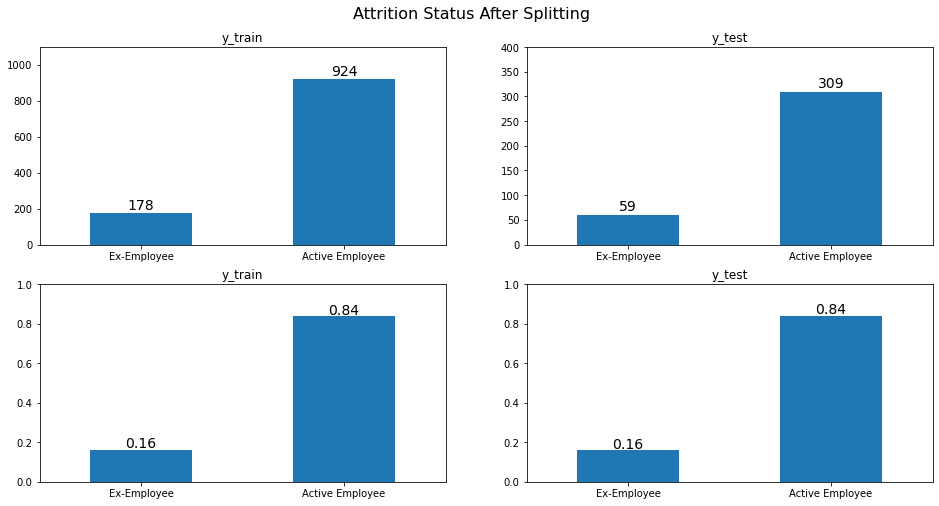

In [95]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g1 = y_train.value_counts().sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1100)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(222)
g2 = y_test.value_counts().sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(223)
g1 = y_train.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = y_test.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

    

plt.suptitle("Attrition Status After Splitting", x=0.5, y=0.95, ha="center", fontsize=16)

plt.show()

# Feature Scaling
Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 1

In [96]:
from sklearn.preprocessing import MinMaxScaler

# define the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))

In [97]:
X_train_scaled = scaler.fit_transform(X_train)

In [98]:
X_test_scaled = scaler.transform(X_test)

In [99]:
print(X_train_scaled.shape)
X_train_scaled

(1102, 49)


array([[0.35714286, 0.34645669, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.78571429, 0.87401575, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.80952381, 0.56406586, 0.85714286, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.52380952, 0.49319971, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.27201145, 0.07142857, ..., 0.        , 1.        ,
        0.        ],
       [0.4047619 , 0.40085898, 0.60714286, ..., 0.        , 1.        ,
        0.        ]])

In [100]:
print(X_test_scaled.shape)
X_test_scaled

(368, 49)


array([[0.35714286, 0.69649248, 0.07142857, ..., 1.        , 0.        ,
        0.        ],
       [0.61904762, 0.71224052, 0.32142857, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.9305655 , 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11904762, 0.31424481, 0.03571429, ..., 1.        , 0.        ,
        0.        ],
       [0.30952381, 0.84037223, 0.03571429, ..., 1.        , 0.        ,
        0.        ],
       [0.9047619 , 0.57551897, 0.17857143, ..., 0.        , 1.        ,
        0.        ]])